In [164]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import pandas as pd 
import plotly as py
import math
import time
from itertools import cycle, islice
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator 
import seaborn as sns
plt.style.use('fivethirtyeight')
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
import warnings
warnings.filterwarnings("ignore")
import plotly.graph_objects as go
import plotly.io as pio
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder, LabelEncoder, MinMaxScaler
import tensorflow as tf
from sklearn.metrics import r2_score
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
import matplotlib.ticker as mtick
from matplotlib import ticker

In [165]:
df = pd.read_csv('epi.csv', low_memory=False)
df

,state_abbv,state_fips,year,website_pollingplace,website_reg_status,website_precinct_ballot,website_absentee_status,website_provisional_status,reg_rej,prov_partic,...,post_election_audit,nonvoter_illness_onyear_pct,nonvoter_illness_offyear_pct,nonvoter_reg_onyear_pct,nonvoter_reg_offyear_pct,online_reg,wait,residual,pct_reg_of_vep_vrs,vep_turnout
0,TX,Texas,2014,1,1,0.0,0.0,0,0.055308,0.004509,...,1.0,NaN,0.097436,NaN,0.028647,0,7.244992,NaN,0.728038,0.283416
1,TN,Tennessee,2014,1,1,1.0,0.0,0,0.100030,0.001026,...,1.0,NaN,0.141904,NaN,0.038935,0,6.582538,NaN,0.743123,0.285635
2,IN,Indiana,2014,1,1,1.0,1.0,1,0.040475,NaN,...,0.0,NaN,0.106958,NaN,0.022689,1,4.858101,NaN,0.751587,0.288243
3,MS,Mississippi,2014,1,0,1.0,0.0,0,NaN,0.006813,...,0.0,NaN,0.185500,NaN,0.019775,0,2.431110,NaN,0.852437,0.288864
4,NY,New York,2014,1,1,0.0,0.0,0,0.134032,0.013328,...,1.0,NaN,0.138558,NaN,0.024116,1,4.624884,NaN,0.764596,0.289778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,NH,New Hampshire,2008,0,0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.170602,NaN,0.021972,NaN,0,7.460956,0.011949,0.843120,0.725281
302,WI,Wisconsin,2008,1,1,NaN,NaN,NaN,NaN,0.000070,...,1.0,0.172879,NaN,0.008173,NaN,0,7.936197,0.004489,0.869157,0.727326
303,MN,Minnesota,2016,1,1,1.0,1.0,.,0.000659,NaN,...,1.0,0.154449,NaN,0.020148,NaN,1,6.853027,0.007765,0.886566,0.742486
304,MN,Minnesota,2012,1,1,1.0,1.0,.,0.000892,NaN,...,1.0,0.162802,NaN,0.012349,NaN,0,6.224818,0.004819,0.876896,0.761147


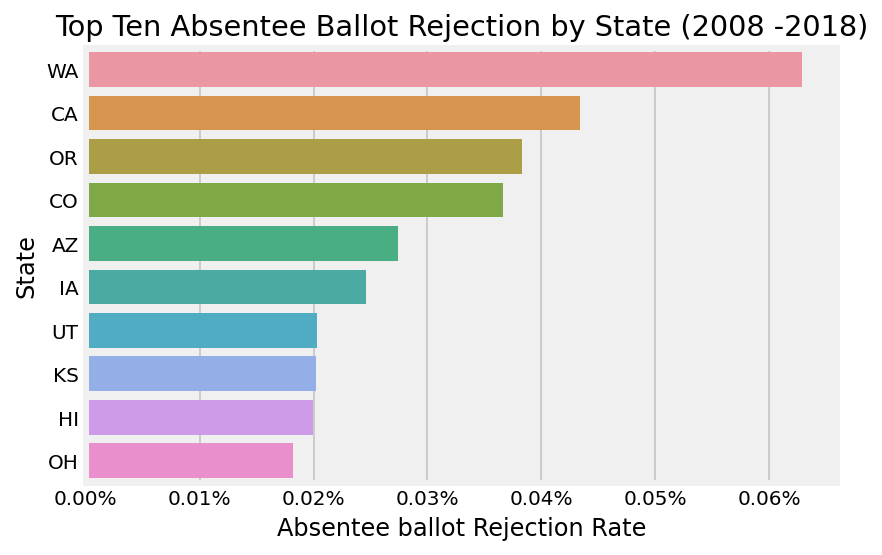

In [166]:
table_count = df.groupby(df['state_abbv'])['abs_rej_all_ballots'].sum()
table_count = table_count.sort_values(ascending=False)[:10]
payee_index = table_count.index
payee_val = table_count.values
ax = sns.barplot(x = payee_val,y=payee_index,orient='h')
#props = dict(boxstyle='round', facecolor='wheat', alpha=0.3)
#plt.annotate("EPI", xy=(0.5, 0.5), fontsize=15, xycoords='axes fraction', bbox=props)
fmt = '%.2f%%'
xticks = mtick.FormatStrFormatter(fmt)
ax.xaxis.set_major_formatter(xticks)
plt.ylabel('State')
plt.xlabel('Absentee ballot Rejection Rate')
ax.set_title("Top Ten Absentee Ballot Rejection by State (2008 -2018)")
plt.show()

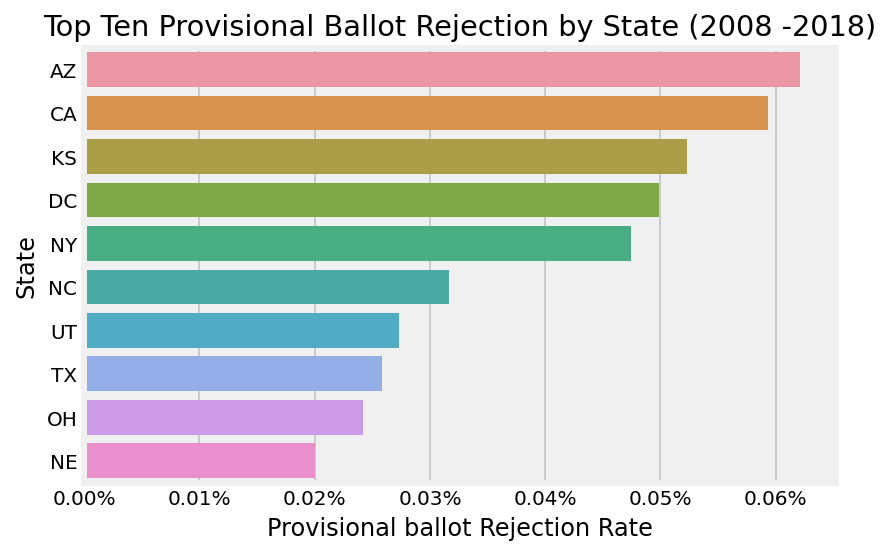

In [167]:
table_count = df.groupby(df['state_abbv'])['prov_rej_all'].sum()
table_count = table_count.sort_values(ascending=False)[:10]
payee_index = table_count.index
payee_val = table_count.values
ax = sns.barplot(x = payee_val,y=payee_index,orient='h')
#props = dict(boxstyle='round', facecolor='wheat', alpha=0.3)
#plt.annotate("EPI", xy=(0.5, 0.5), fontsize=15, xycoords='axes fraction', bbox=props)
fmt = '%.2f%%'
xticks = mtick.FormatStrFormatter(fmt)
ax.xaxis.set_major_formatter(xticks)
plt.ylabel('State')
plt.xlabel('Provisional ballot Rejection Rate')
ax.set_title("Top Ten Provisional Ballot Rejection by State (2008 -2018)")
plt.show()

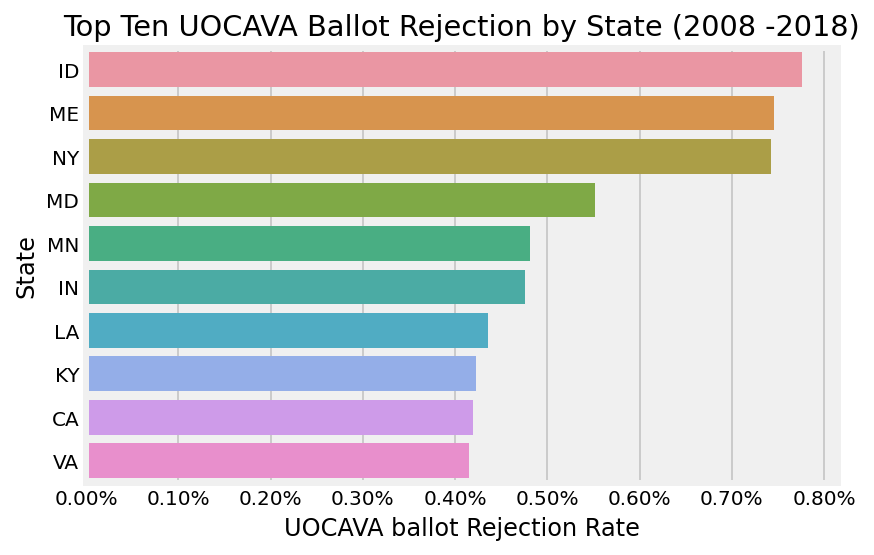

In [168]:
table_count = df.groupby(df['state_abbv'])['uocava_rej'].sum()
table_count = table_count.sort_values(ascending=False)[:10]
payee_index = table_count.index
payee_val = table_count.values
ax = sns.barplot(x = payee_val,y=payee_index,orient='h')
#props = dict(boxstyle='round', facecolor='wheat', alpha=0.3)
#plt.annotate("EPI", xy=(0.5, 0.5), fontsize=15, xycoords='axes fraction', bbox=props)
fmt = '%.2f%%'
xticks = mtick.FormatStrFormatter(fmt)
ax.xaxis.set_major_formatter(xticks)
plt.ylabel('State')
plt.xlabel('UOCAVA ballot Rejection Rate')
ax.set_title("Top Ten UOCAVA Ballot Rejection by State (2008 -2018)")
plt.show()

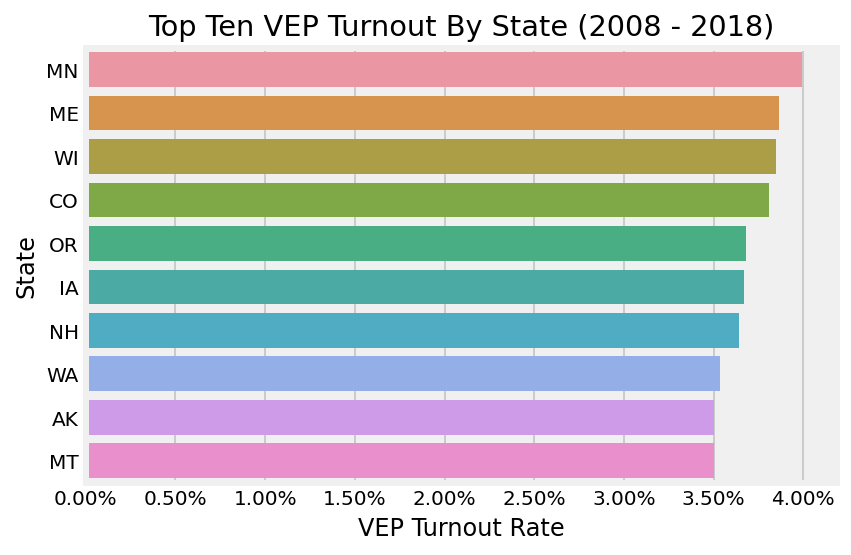

In [169]:
table_count = df.groupby(df['state_abbv'])['vep_turnout'].sum()
table_count = table_count.sort_values(ascending=False)[:10]
payee_index = table_count.index
payee_val = table_count.values
ax = sns.barplot(x = payee_val,y=payee_index,orient='h')
#props = dict(boxstyle='round', facecolor='wheat', alpha=0.3)
#plt.annotate("EPI", xy=(0.5, 0.5), fontsize=15, xycoords='axes fraction', bbox=props)
fmt = '%.2f%%'
xticks = mtick.FormatStrFormatter(fmt)
ax.xaxis.set_major_formatter(xticks)
plt.ylabel('State')
plt.xlabel('VEP Turnout Rate')
ax.set_title("Top Ten VEP Turnout By State (2008 - 2018)")
plt.show()

In [170]:
df1 = df.drop(['state_abbv', 'state_fips', 'website_reg_status', 'website_provisional_status', 'online_reg'],axis=1)
df1 = df1.fillna(0)
df1

,year,website_pollingplace,website_precinct_ballot,website_absentee_status,reg_rej,prov_partic,prov_rej_all,abs_rej_all_ballots,abs_nonret,uocava_rej,...,eavs_completeness,post_election_audit,nonvoter_illness_onyear_pct,nonvoter_illness_offyear_pct,nonvoter_reg_onyear_pct,nonvoter_reg_offyear_pct,wait,residual,pct_reg_of_vep_vrs,vep_turnout
0,2014,1,0.0,0.0,0.055308,0.004509,0.003323,0.001110,0.140261,0.082599,...,0.974932,1.0,0.000000,0.097436,0.000000,0.028647,7.244992,0.000000,0.728038,0.283416
1,2014,1,1.0,0.0,0.100030,0.001026,0.000594,0.000086,0.102461,0.036513,...,0.995547,1.0,0.000000,0.141904,0.000000,0.038935,6.582538,0.000000,0.743123,0.285635
2,2014,1,1.0,1.0,0.040475,0.000000,0.000000,0.004489,0.008893,0.161383,...,0.968887,0.0,0.000000,0.106958,0.000000,0.022689,4.858101,0.000000,0.751587,0.288243
3,2014,1,1.0,0.0,0.000000,0.006813,0.001453,0.000907,0.091958,0.016393,...,0.935205,0.0,0.000000,0.185500,0.000000,0.019775,2.431110,0.000000,0.852437,0.288864
4,2014,1,0.0,0.0,0.134032,0.013328,0.005568,0.003043,0.250948,0.080987,...,0.906254,1.0,0.000000,0.138558,0.000000,0.024116,4.624884,0.000000,0.764596,0.289778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,2008,0,0.0,0.0,0.000000,0.000000,0.000000,0.001764,0.047409,0.043616,...,0.687500,0.0,0.170602,0.000000,0.021972,0.000000,7.460956,0.011949,0.843120,0.725281
302,2008,1,0.0,0.0,0.000000,0.000070,0.000039,0.000914,0.053276,0.039234,...,0.881599,1.0,0.172879,0.000000,0.008173,0.000000,7.936197,0.004489,0.869157,0.727326
303,2016,1,1.0,1.0,0.000659,0.000000,0.000000,0.002045,0.075431,0.075765,...,1.000000,1.0,0.154449,0.000000,0.020148,0.000000,6.853027,0.007765,0.886566,0.742486
304,2012,1,1.0,1.0,0.000892,0.000000,0.000000,0.002634,0.043200,0.076314,...,1.000000,1.0,0.162802,0.000000,0.012349,0.000000,6.224818,0.004819,0.876896,0.761147


In [171]:
# the last column is our label
y_train = df1.iloc[:,-1:]
#drop last column of data
X_train = df1.iloc[:, :-1]
#drop first colum of data
X_test = df1.iloc[:,1:]
# lets have a look on the shape 
print(X_train.shape,y_train.shape,X_test.shape)

(306, 20) (306, 1) (306, 20)


In [172]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(max_depth=5, random_state=1, n_estimators=1000).fit(X_train, y_train)
y_pred = model.predict(X_train)
print(y_pred)
print(f"Predict_Score: {model.score(X_train, y_train)}")

[0.33364138 0.33237748 0.35235005 0.37974416 0.33622323 0.34233151
 0.38473102 0.33388253 0.36053111 0.34560082 0.36152173 0.39066344
 0.37642547 0.3970306  0.37767497 0.37863958 0.43116628 0.39516775
 0.39094345 0.36667035 0.40291951 0.38382686 0.37465363 0.39922889
 0.384303   0.39440647 0.39358648 0.39217469 0.41545259 0.38848704
 0.42657772 0.41060616 0.38467428 0.39623937 0.40021047 0.41316384
 0.41192925 0.43903166 0.40662824 0.42296492 0.39817739 0.40292492
 0.40998397 0.3823256  0.40997052 0.40792205 0.40976775 0.40554351
 0.40639274 0.4478672  0.42580374 0.40425701 0.43704611 0.41199138
 0.39185646 0.48738721 0.4084171  0.42749599 0.44250137 0.44358217
 0.42730916 0.42049106 0.41287909 0.39841133 0.48969834 0.41758192
 0.42047813 0.4059013  0.39621975 0.47356411 0.47852365 0.41832431
 0.40163103 0.42759759 0.49046853 0.41784164 0.4841914  0.42173482
 0.41615775 0.44403494 0.4076911  0.40289897 0.44797646 0.46370856
 0.47676213 0.47827157 0.41957537 0.42968383 0.45394886 0.4212

In [173]:
prediction = pd.DataFrame({'state':df.state_abbv,'Actual':df1.vep_turnout, 'Prediction': y_pred})
prediction

,state,Actual,Prediction
0,TX,0.283416,0.333641
1,TN,0.285635,0.332377
2,IN,0.288243,0.352350
3,MS,0.288864,0.379744
4,NY,0.289778,0.336223
...,...,...,...
301,NH,0.725281,0.706737
302,WI,0.727326,0.696748
303,MN,0.742486,0.727403
304,MN,0.761147,0.727579


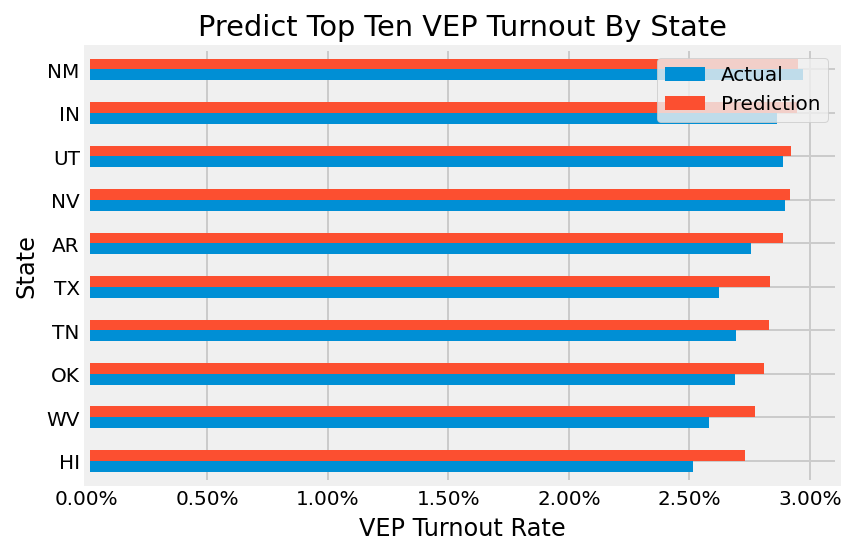

In [174]:
table_count = prediction.groupby(prediction['state'])['Actual', 'Prediction'].sum() 
table_count = table_count.sort_values(by='Prediction', ascending=True)[:10]
word = [table_count]
props = dict(boxstyle='round', facecolor='wheat', alpha=0.3)
ax = table_count.plot.barh()
fmt = '%.2f%%'
xticks = mtick.FormatStrFormatter(fmt)
ax.xaxis.set_major_formatter(xticks)
plt.ylabel('State')
plt.xlabel('VEP Turnout Rate')
ax.set_title("Predict Top Ten VEP Turnout By State")
plt.show()